# Aim of the Project

**We aim to analyze the growth and market dominance of major players in the used-car resale market (Cars24, CarWale, Spinny, etc.), using exploratory data analysis and predictive modeling. This analysis will provide insights into revenue trends, market share distribution, customer engagement, and vehicle lifecycle to support potential investors or new entrants assessing market viability.**

**Steps for EDA(Exploratory Data Analysis )**


*   Step1:import the librarier,load and read the dataset.
*   Step2:Data Cleaning.
*   Step3:Data visualization.
*   Step4:Advanca Visualization And Outlier Detection.
*   Step5:Feature engineering

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv('/content/cars24_20221210.csv')
df.head()

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28


In [71]:
df.shape

(6437, 19)

In [72]:
df.columns

Index(['name', 'make', 'model', 'city', 'year', 'fueltype', 'kilometerdriven',
       'ownernumber', 'transmission', 'bodytype', 'storename', 'isc24assured',
       'registrationcity', 'registrationstate', 'benefits', 'discountprice',
       'price', 'url', 'createdDate'],
      dtype='object')

In [73]:
df.describe()

,year,kilometerdriven,ownernumber,benefits,discountprice,price
count,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000,6.437000e+03
mean,2017.636166,41568.066335,1.235669,12079.200559,23500.592512,6.781378e+05
std,2.656825,26187.115364,0.454501,2458.162316,41579.296564,3.450395e+05
min,2008.000000,64.000000,1.000000,9688.000000,-155500.000000,1.340000e+05
25%,2016.000000,20580.000000,1.000000,9688.000000,-100.000000,4.390000e+05
50%,2018.000000,38177.000000,1.000000,12542.000000,10600.000000,5.880000e+05
75%,2020.000000,59333.000000,1.000000,13898.000000,37000.000000,8.290000e+05
max,2022.000000,455601.000000,3.000000,19407.000000,388300.000000,3.048000e+06


In [74]:
## checking null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

,0
transmission,376
bodytype,375


In [75]:
# Fill missing values in 'transmission' and 'bodytype' with 'Unknown'
df['transmission'] = df['transmission'].fillna('Unknown')
df['bodytype'] = df['bodytype'].fillna('Unknown')

In [76]:
df.duplicated().sum()

np.int64(15)

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
import datetime
current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']
df.head()

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate,age
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24,8
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09,9
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30,6
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04,5
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28,8


In [79]:
df['isc24assured']=df['isc24assured'].astype(int)
df['isc24assured'].value_counts()

,count
isc24assured,
0,6371
1,51


In [80]:
df['price_after_discount'] = df['price'] - df['discountprice']

In [81]:
df.drop(columns=['year','url','createdDate','storename','bodytype','registrationcity','price','discountprice'],inplace=True)

In [82]:
df.head()

,name,make,model,city,fueltype,kilometerdriven,ownernumber,transmission,isc24assured,registrationstate,benefits,age,price_after_discount
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,Petrol,35939,2,Manual,0,Kerala,13898,8,559601
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,Petrol + Cng,6180,1,Manual,0,Maharashtra,12542,9,323901
2,Maruti Dzire,Maruti,Dzire,Lucknow,Petrol + Cng,46808,1,Manual,0,Uttar Pradesh,13898,6,614000
3,KIA SELTOS,Kia,Seltos,Bangalore,Diesel,26045,1,Manual,0,Karnataka,9688,5,1210300
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,Petrol,53056,1,Manual,0,West Bengal,13898,8,653200


In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['transmission']=le.fit_transform(df['transmission'])
df['fueltype']=le.fit_transform(df['fueltype'])
df['name']=le.fit_transform(df['name'])
df['registrationstate']=le.fit_transform(df['registrationstate'])

In [90]:
df['transmission']=df['transmission'].astype(int)
df['fueltype']=df['fueltype'].astype(int)
df['name']=df['name'].astype(int)
df['registrationstate']=df['registrationstate'].astype(int)

In [85]:
print(df['transmission'].value_counts())
print(df['fueltype'].value_counts())
print(df['name'].value_counts())

transmission
1    4993
0    1054
2     375
Name: count, dtype: int64
fueltype
1    5059
0     971
2     392
Name: count, dtype: int64
name
33    369
83    311
70    300
87    290
29    289
     ... 
4       1
13      1
5       1
1       1
97      1
Name: count, Length: 135, dtype: int64


In [86]:
df.drop(columns=['benefits'],inplace=True)

In [91]:
df.head()

,name,make,model,city,fueltype,kilometerdriven,ownernumber,transmission,isc24assured,registrationstate,age,price_after_discount
0,29,Hyundai,Elite I20,Kochi,1,35939,2,1,0,7,8,559601
1,68,Maruti,Alto 800,Mumbai,2,6180,1,1,0,9,9,323901
2,74,Maruti,Dzire,Lucknow,2,46808,1,1,0,14,6,614000
3,49,Kia,Seltos,Bangalore,0,26045,1,1,0,6,5,1210300
4,76,Maruti,Ertiga,Kolkata,1,53056,1,1,0,15,8,653200


In [95]:
df['registrationstate'].unique()

array([ 7,  9, 14,  6, 15,  8,  3, 13, 12,  5,  4, 10, 11,  0,  1,  2])

In [96]:
df.drop(columns=['city','make','model'],inplace=True)

In [97]:
df.head()

,name,fueltype,kilometerdriven,ownernumber,transmission,isc24assured,registrationstate,age,price_after_discount
0,29,1,35939,2,1,0,7,8,559601
1,68,2,6180,1,1,0,9,9,323901
2,74,2,46808,1,1,0,14,6,614000
3,49,0,26045,1,1,0,6,5,1210300
4,76,1,53056,1,1,0,15,8,653200


**Data visualization**

In [98]:
corr=df.corr()
corr

,name,fueltype,kilometerdriven,ownernumber,transmission,isc24assured,registrationstate,age,price_after_discount
name,1.000000,0.028962,-0.072045,-0.060317,0.027935,-0.011098,-0.035827,-0.129433,-0.016684
fueltype,0.028962,1.000000,-0.185434,-0.039805,0.064314,-0.063690,-0.058974,-0.034973,-0.342294
kilometerdriven,-0.072045,-0.185434,1.000000,0.148514,-0.079664,0.118712,0.044748,0.508816,-0.196889
ownernumber,-0.060317,-0.039805,0.148514,1.000000,-0.046887,0.030784,0.018554,0.258692,-0.148740
transmission,0.027935,0.064314,-0.079664,-0.046887,1.000000,-0.017584,-0.002155,-0.056123,-0.128611
isc24assured,-0.011098,-0.063690,0.118712,0.030784,-0.017584,1.000000,-0.015318,0.072266,-0.018178
registrationstate,-0.035827,-0.058974,0.044748,0.018554,-0.002155,-0.015318,1.000000,0.004262,-0.039988
age,-0.129433,-0.034973,0.508816,0.258692,-0.056123,0.072266,0.004262,1.000000,-0.506347
price_after_discount,-0.016684,-0.342294,-0.196889,-0.148740,-0.128611,-0.018178,-0.039988,-0.506347,1.000000


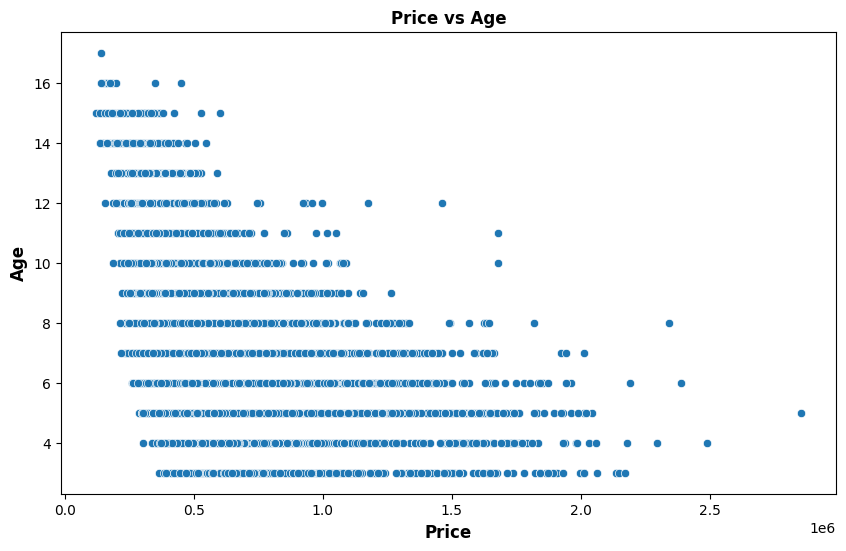

In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='price_after_discount',y='age',palette='rocket')
plt.title('Price vs Age',size=12,color='black',weight='bold')
plt.xlabel('Price',size=12,color='black',weight='bold')
plt.ylabel('Age',size=12,color='black',weight='bold')
plt.show()

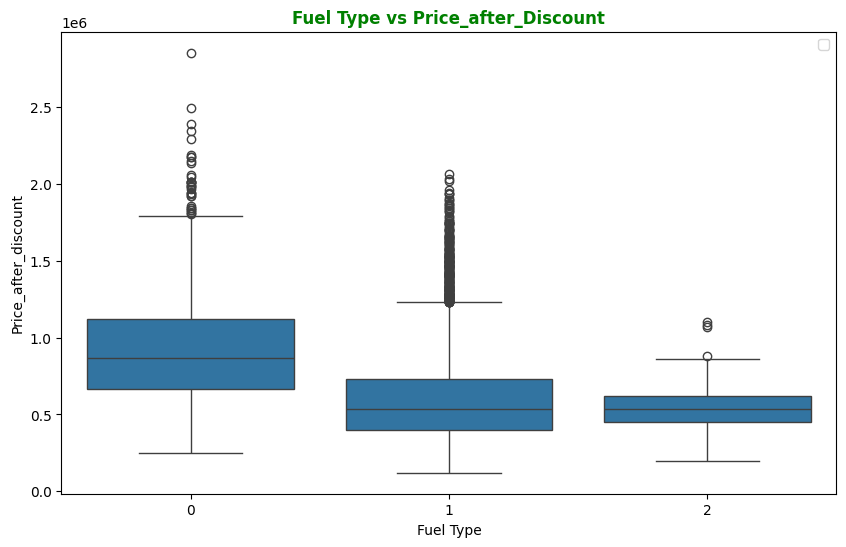

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fueltype',y='price_after_discount',data=df)
plt.title('Fuel Type vs Price_after_Discount',size=12,color='green',weight='bold')
plt.xlabel('Fuel Type')
plt.ylabel('Price_after_discount')
plt.legend()
plt.show()

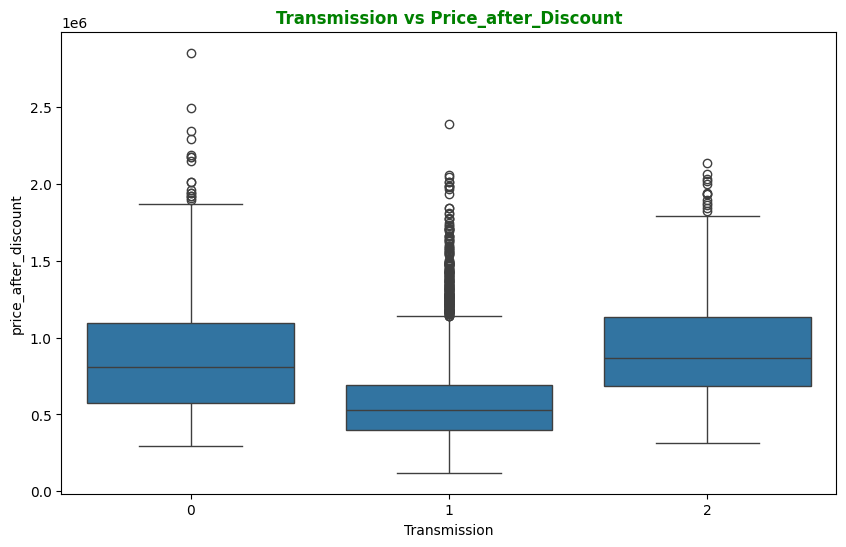

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission',y='price_after_discount',data=df)
plt.title('Transmission vs Price_after_Discount',size=12,color='green',weight='bold')
plt.xlabel('Transmission')
plt.show()

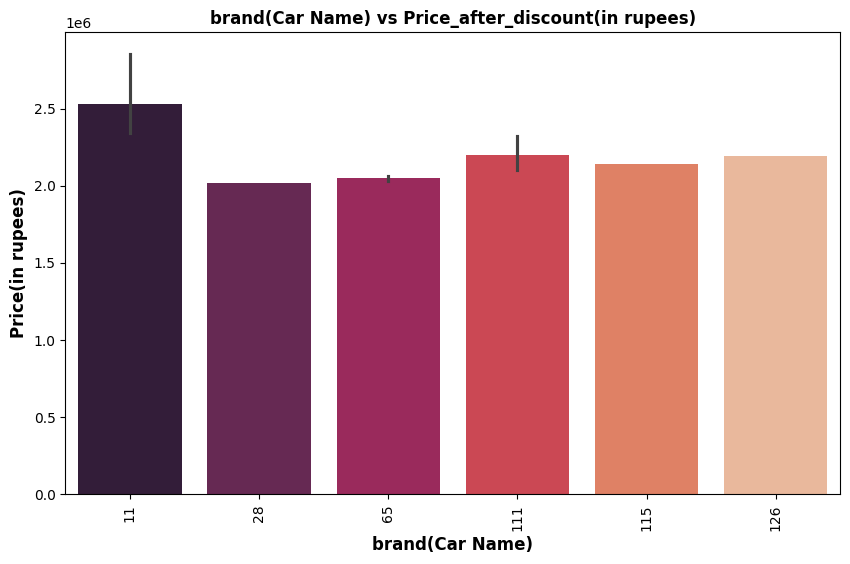

In [107]:
plt.figure(figsize=(10,6))
sorted_df = df.sort_values(by='price_after_discount', ascending=False)
sns.barplot(x='name',y='price_after_discount',data=sorted_df.head(15),palette='rocket')
plt.title('brand(Car Name) vs Price_after_discount(in rupees)',size=12,color='black',weight='bold')
plt.xlabel('brand(Car Name)',size=12,color='black',weight='bold')
plt.ylabel('Price(in rupees)',size=12,color='black',weight='bold')
plt.xticks(rotation=90)
plt.show()

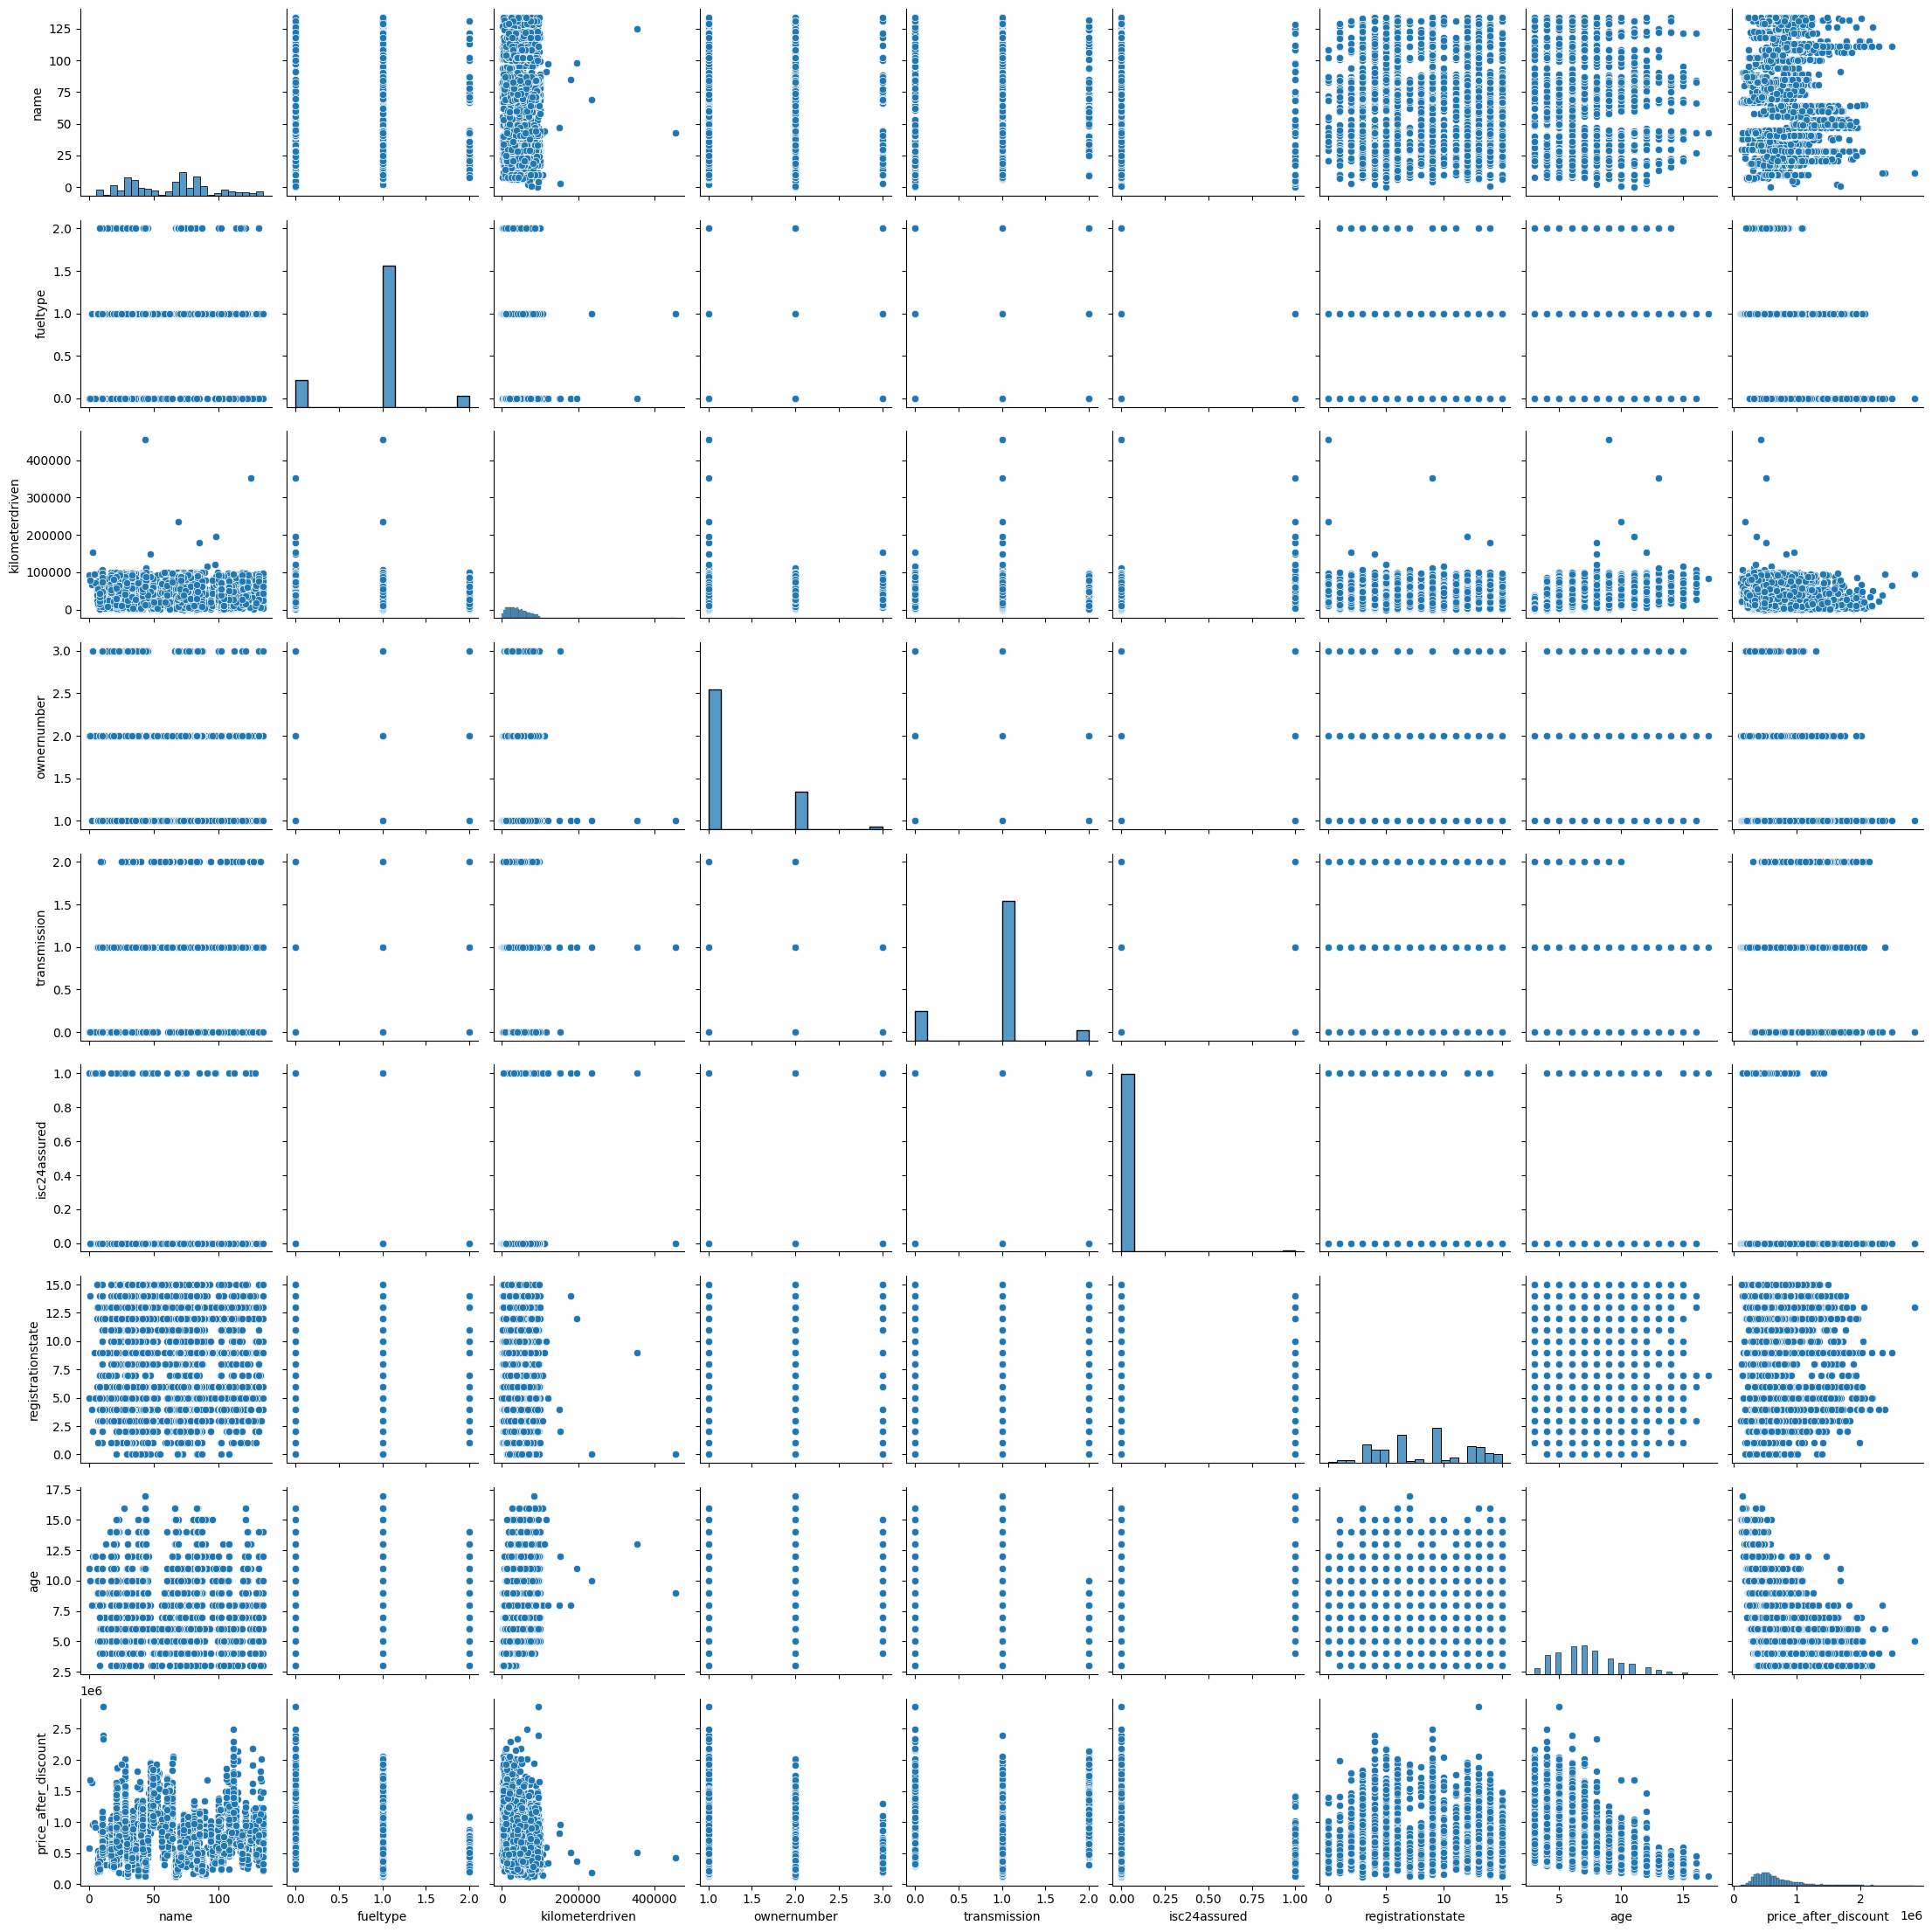

In [108]:
sns.pairplot(df)
plt.show()

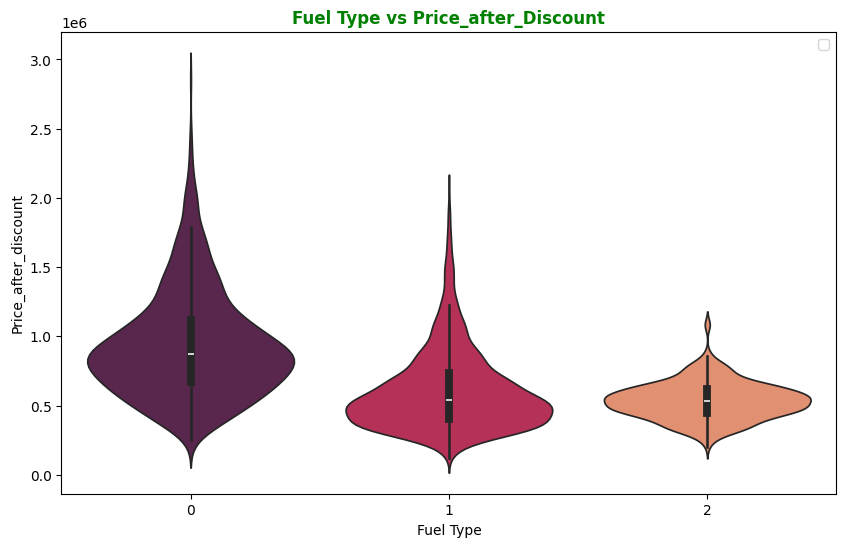

In [109]:
plt.figure(figsize=(10,6))
sns.violinplot(x='fueltype',y='price_after_discount',data=df,palette='rocket')
plt.title('Fuel Type vs Price_after_Discount',size=12,color='green',weight='bold')
plt.xlabel('Fuel Type')
plt.ylabel('Price_after_discount')
plt.legend()
plt.show()

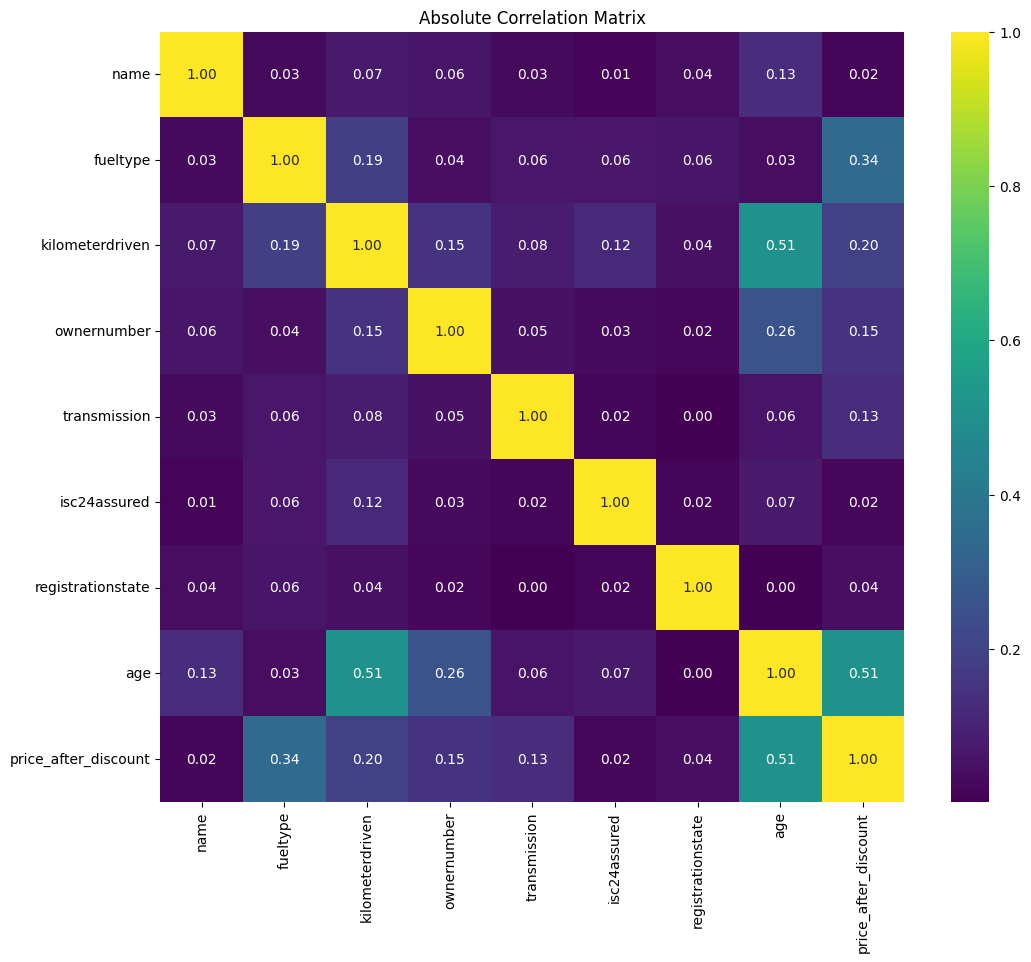

In [100]:

corr= corr.abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Absolute Correlation Matrix')
plt.show()

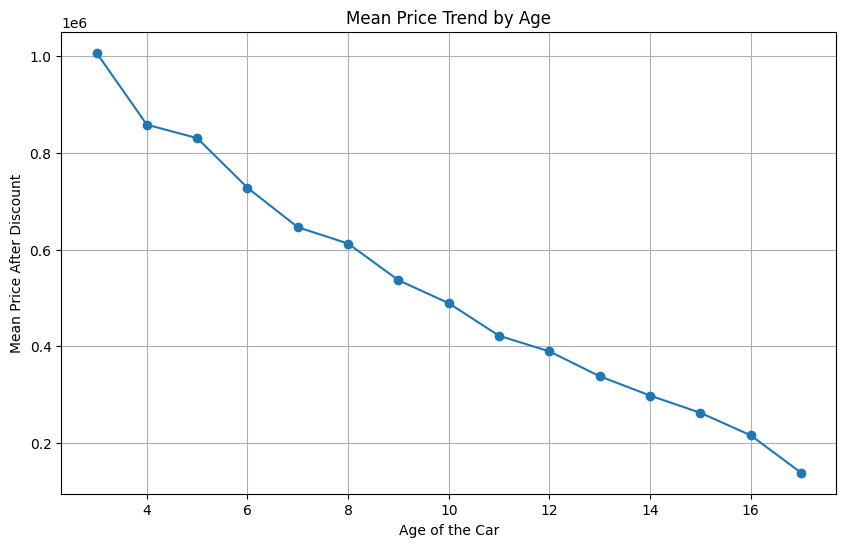

In [112]:
plt.figure(figsize=(10, 6))
df.groupby('age')['price_after_discount'].mean().plot(kind='line', marker='o')
plt.title('Mean Price Trend by Age')
plt.xlabel('Age of the Car')
plt.ylabel('Mean Price After Discount')
plt.grid(True)


In [113]:
Q1 = df['price_after_discount'].quantile(0.25)
Q3 = df['price_after_discount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Q1: 425100.0
Q3: 801150.0
IQR: 376050.0
Lower Bound: -138975.0
Upper Bound: 1365225.0


In [131]:
outliers = df[(df['price_after_discount'] < lower_bound) | (df['price_after_discount'] > upper_bound)]



In [115]:
print(f"Shape of the dataframe before removing outliers: {df.shape}")
df = df[(df['price_after_discount'] >= lower_bound) & (df['price_after_discount'] <= upper_bound)]
print(f"Shape of the dataframe after removing outliers: {df.shape}")

Shape of the dataframe before removing outliers: (6422, 9)
Shape of the dataframe after removing outliers: (6137, 9)


In [122]:
df.head()

,name,fueltype,kilometerdriven,ownernumber,transmission,isc24assured,registrationstate,age,price_after_discount
0,29,1,35939,2,1,0,7,8,559601
1,68,2,6180,1,1,0,9,9,323901
2,74,2,46808,1,1,0,14,6,614000
3,49,0,26045,1,1,0,6,5,1210300
4,76,1,53056,1,1,0,15,8,653200
